In this machine learning project, we will build a model to authenticate banknotes as genuine or fake using the K-Means clustering algorithm. The dataset consists of features extracted from images of banknotes, and we will use K-Means to cluster the data into two groups: genuine and fake banknotes

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score


In [ ]:

data = pd.read_csv('data_with_labels.csv')
data

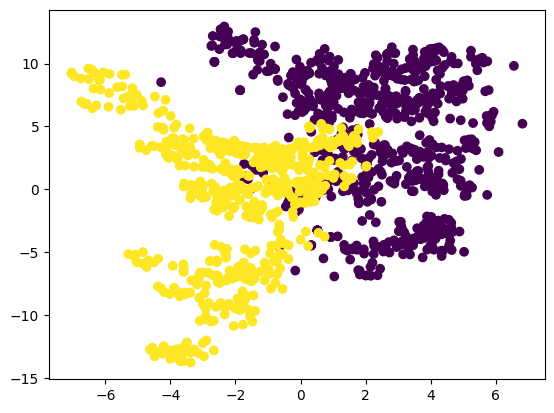

In [58]:
plt.scatter(data['V1'],data['V2'],c=data['Class'])

In [59]:
data = data.drop(['V3', 'V4'], axis=1)


In [60]:
X = data[['V1', 'V2']]  # Features: 'v1' and 'v2'
y = data['Class']       # Target: 'class'

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [63]:
X_train.shape

(919, 2)

In [67]:
# here Finding right number of clusters in our data manually

wcss = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [68]:
wcss

[39775.38980923816,
 18078.82732512665,
 11205.284707930365,
 8514.660610623507,
 6675.275127166511,
 5111.967091078652,
 4367.156896249501,
 3807.029661446226,
 3166.4765128986573,
 2720.750723152185]

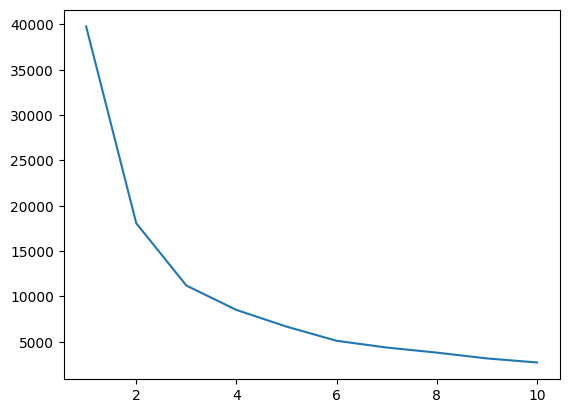

In [69]:
plt.plot(range(1,11),wcss)


Here as we can see that may be the numbers of clusters are 3

Confirm it my using kneelocator

In [70]:
!pip install kneed

In [73]:

kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

It is providing us value 4 so we create our Model Using 4 number of clusters

In [75]:
kmeans = KMeans(n_clusters=3,init='k-means++')
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
y_labels = kmeans.fit_predict(X_train)
y_labels

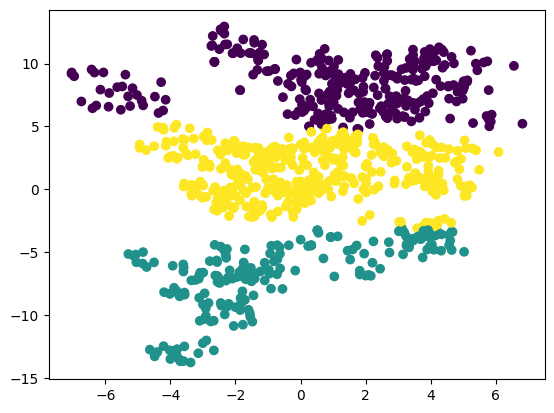

In [77]:
plt.scatter(X_train['V1'],X_train['V2'],c=y_labels)

Here As we can see the our Four Clusters but we need to find that bank notes are real or fake so for that we make 2 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


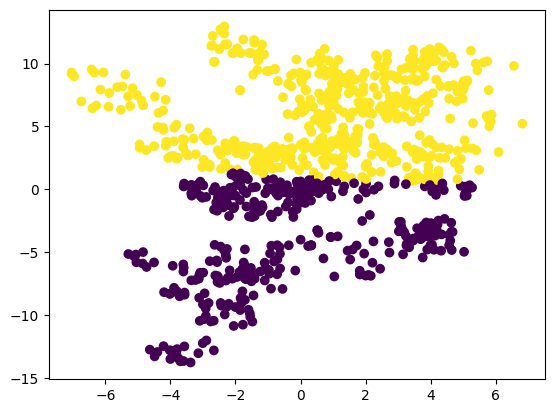

In [78]:
kmeans = KMeans(n_clusters=2,init='k-means++')
kmeans.fit(X_train)
y_labels = kmeans.fit_predict(X_train)
y_labels
plt.scatter(X_train['V1'],X_train['V2'],c=y_labels)

So in the following graph we can see the two clusters with a real and fake notes clusters

Next Step is performance Metrices
So in the Clustering we use silhoutte Score

In [ ]:

silhoutte_coefficients = []

for k in range(2,11):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  score = silhouette_score(X_train,kmeans.labels_)
  silhoutte_coefficients.append(score)

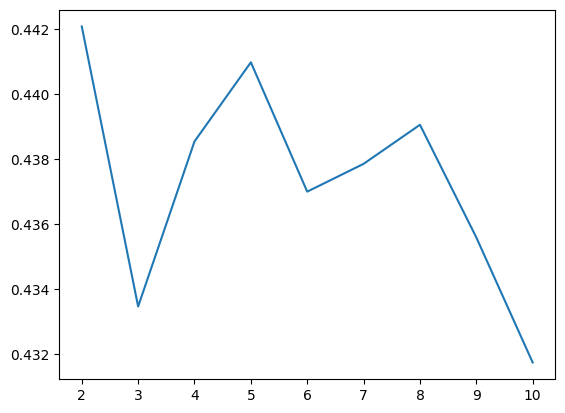

In [81]:
plt.plot(range(2,11),silhoutte_coefficients)

Here Clearly u can see the Highest value of a score when the Number of Clusters are 2